In [1]:
#!pip install pandas
#!pip install tensorflow==2.10.1
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy

In [35]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [36]:
from dotenv import load_dotenv
load_dotenv()

True

### Storing the images into a dataset

In [4]:
TRAIN_DATA_DIR = os.environ.get('TRAIN_DATA_DIR')
VALID_DATA_DIR = os.environ.get('VALID_DATA_DIR')
TEST_DATA_DIR = os.environ.get('TEST_DATA_DIR')

# Load the training data
train_ds = image_dataset_from_directory(
    TRAIN_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the validation data
val_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)


Found 25136 files belonging to 5 classes.
Found 2812 files belonging to 5 classes.
Found 1649 files belonging to 5 classes.


In [5]:
class_names = train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

IndexError: list index out of range

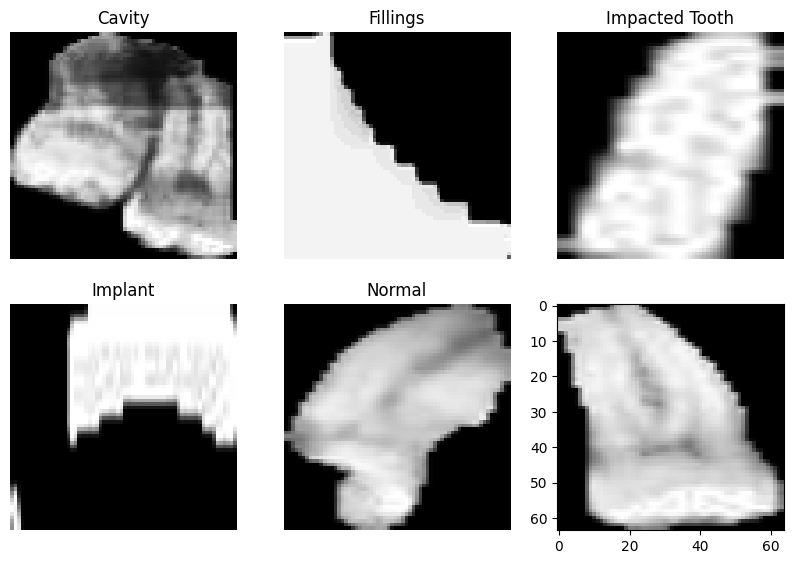

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[i])
    plt.axis("off")

In [ ]:
for i, element in enumerate(train_ds.as_numpy_iterator()):
    if i<1:
        print(element[0])
        print(element[1])
    else:
        break

### Data normalization,
Code not used in the preprocessing pipeline because the normalization is included in a layer of the model

In [7]:
train_ds_norm = train_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(train_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.08627451


In [8]:
test_ds_norm = test_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(test_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [9]:
val_ds_norm = val_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(val_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.92156863


Saving the datasets

In [10]:
#train_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/train')
#test_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test')
#val_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')

Loading the dataset

In [11]:
#import tensorflow as tf

#new = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')
#new

In [12]:
#for i, element in enumerate(new.as_numpy_iterator()):
#    if i<1:
#        print(element[0])
#        print(element[1])
#    else:
#        break

## evaluate model

In [68]:
from tensorflow.keras.models import load_model

model = load_model('/home/enric/code/tdurova/starsmiles/models/model.keras')

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


In [70]:
metrics = model.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6009 - loss: 1.3009 
1.3932242393493652 0.5909090638160706


## Preprocess and prediction

In [16]:
#!pip install Pillow

input_image = input('Enter path to image: ')

In [17]:
from tensorflow.keras.utils import img_to_array
from PIL import Image

image = Image.open(input_image)
img = img_to_array(image)
img.shape[2]

3

In [18]:
img.shape[:2]

(64, 64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


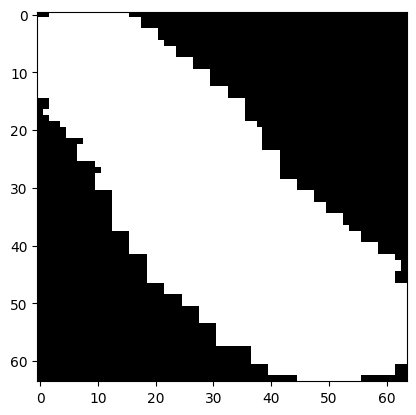

In [19]:
from tensorflow.keras.preprocessing.image import smart_resize

resized_im = smart_resize(img, (64,64))
plt.imshow(resized_im)

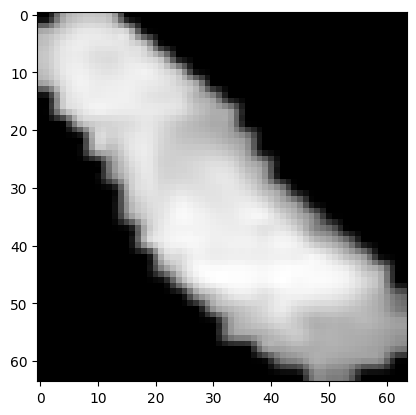

In [20]:
from tensorflow.image import rgb_to_grayscale

grey_res_im = rgb_to_grayscale(resized_im)
plt.imshow(grey_res_im, cmap='gray')

In [21]:
print(grey_res_im.shape, type(grey_res_im))

(64, 64, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [22]:
p = np.expand_dims(grey_res_im, axis=0)

pred = model.predict(p)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[3.21314514e-01, 1.22509815e-01, 1.91386076e-04, 1.08793518e-02,
        5.45105040e-01]], dtype=float32)

In [23]:
p.shape

(1, 64, 64, 1)

In [24]:
class_names= train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

In [25]:
threshold = 0.5
for i in range(len(class_names)):
    print(f'Probability of {class_names[i]}: {round(100*pred[0,i],2)}%')

    if pred[0,i]>threshold:
        threshold=pred[0,i]
        prediction = class_names[i]

print(f'Prediction is: {prediction}')


Probability of Cavity: 32.13%
Probability of Fillings: 12.25%
Probability of Impacted Tooth: 0.02%
Probability of Implant: 1.09%
Probability of Normal: 54.51%
Prediction is: Normal


# baseline model
Created by Tanja Durova

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model = Sequential()

# Define the input shape explicitly using Input
model.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model.add(layers.Rescaling(1./255))

# First Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model.add(layers.Dropout(0.5))

# Output Layer with Softmax
model.add(layers.Dense(5, activation="softmax"))

In [20]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,381 (911.64 KB)

 Trainable params: 233,381 (911.64 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras import callbacks

MODEL = "model"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [24]:
%%time
history = model.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
785/786 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6841 - loss: 0.8780
Epoch 1: val_loss improved from inf to 0.53439, saving model to model.keras
786/786 ━━━━━━━━━━━━━━━━━━━━ 62s 76ms/step - accuracy: 0.6842 - loss: 0.8777 - val_accuracy: 0.7952 - val_loss: 0.5344 - learning_rate: 0.0010
Epoch 2/30
785/786 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7568 - loss: 0.6230
Epoch 2: val_loss improved from 0.53439 to 0.45037, saving model to model.keras
786/786 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.7568 - loss: 0.6230 - val_accuracy: 0.8304 - val_loss: 0.4504 - learning_rate: 0.0010
Epoch 3/30
785/786 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8100 - loss: 0.5325
Epoch 3: val_loss improved from 0.45037 to 0.43784, saving model to model.keras
786/786 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8101 - loss: 0.5324 - val_accuracy: 0.8435 - val_loss: 0.4378 - learning_rate: 0.0010
Epoch 4/30
785/786 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8427 - 

In [31]:
import matplotlib.pyplot as plt

def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

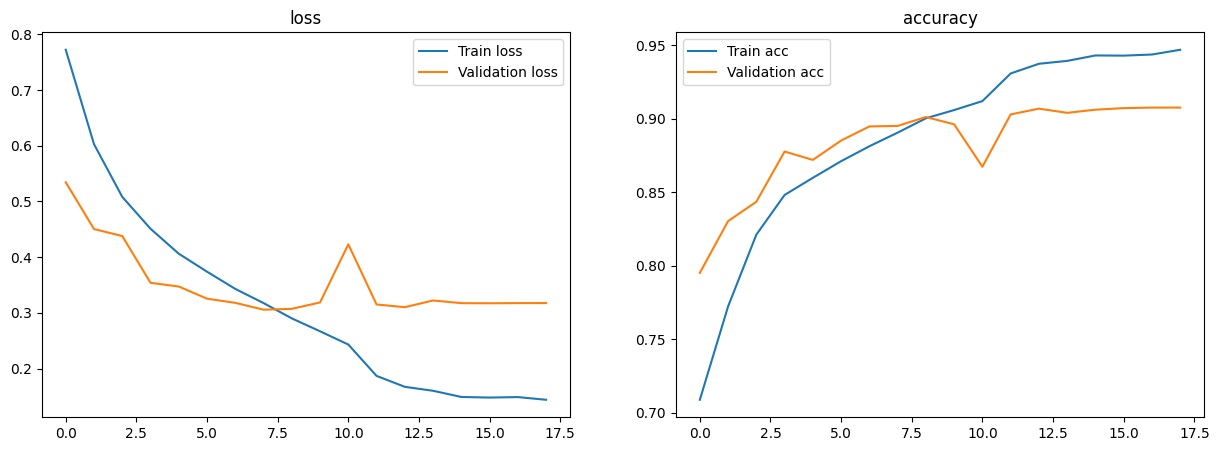

In [32]:
plot_history(history)

# New model 1
Training the baseline model with a balanced dataset

In [37]:
from dotenv import load_dotenv
load_dotenv()

True

### Load datasets with balanced train and validation directories

In [63]:
TRAIN_BAL_DATA_DIR = os.environ.get('TRAIN_BAL_DATA_DIR')
VALID_BAL_DATA_DIR = os.environ.get('VALID_BAL_DATA_DIR')
TEST_BAL_DATA_DIR = os.environ.get('TEST_BAL_DATA_DIR')

# Load the training data
train_bal_ds = image_dataset_from_directory(
    TRAIN_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the validation data
val_bal_ds = image_dataset_from_directory(
    VALID_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_bal_ds = image_dataset_from_directory(
    TEST_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

Found 2140 files belonging to 5 classes.
Found 190 files belonging to 5 classes.
Found 110 files belonging to 5 classes.


In [39]:
class_names = train_bal_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

In [74]:
#train_bal_ds.save('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/train')
#test_bal_ds.save('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/test')
#val_bal_ds.save('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/valid')

In [75]:
import tensorflow as tf

#train = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/train')
#test = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/test')
#valid = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data_balanced/datasets/valid')

### Train baseline model with balanced data

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model1 = Sequential()

# Define the input shape explicitly using Input
model1.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model1.add(layers.Rescaling(1./255))

# First Convolutional Block
model1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model1.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model1.add(layers.Flatten())

# Fully Connected Dense Layer
model1.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model1.add(layers.Dropout(0.5))

# Output Layer with Softmax
model1.add(layers.Dense(5, activation="softmax"))

In [77]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model1.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,381 (911.64 KB)

 Trainable params: 233,381 (911.64 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.keras import callbacks

MODEL = "model1"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [79]:
%%time
history = model1.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2417 - loss: 1.5806
Epoch 1: val_loss improved from inf to 1.33438, saving model to model1.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.2426 - loss: 1.5799 - val_accuracy: 0.5158 - val_loss: 1.3344 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4320 - loss: 1.3307
Epoch 2: val_loss improved from 1.33438 to 1.06414, saving model to model1.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.4326 - loss: 1.3294 - val_accuracy: 0.4947 - val_loss: 1.0641 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5419 - loss: 1.1170
Epoch 3: val_loss improved from 1.06414 to 0.97637, saving model to model1.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5420 - loss: 1.1168 - val_accuracy: 0.6421 - val_loss: 0.9764 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5587 - loss: 1.0682
E

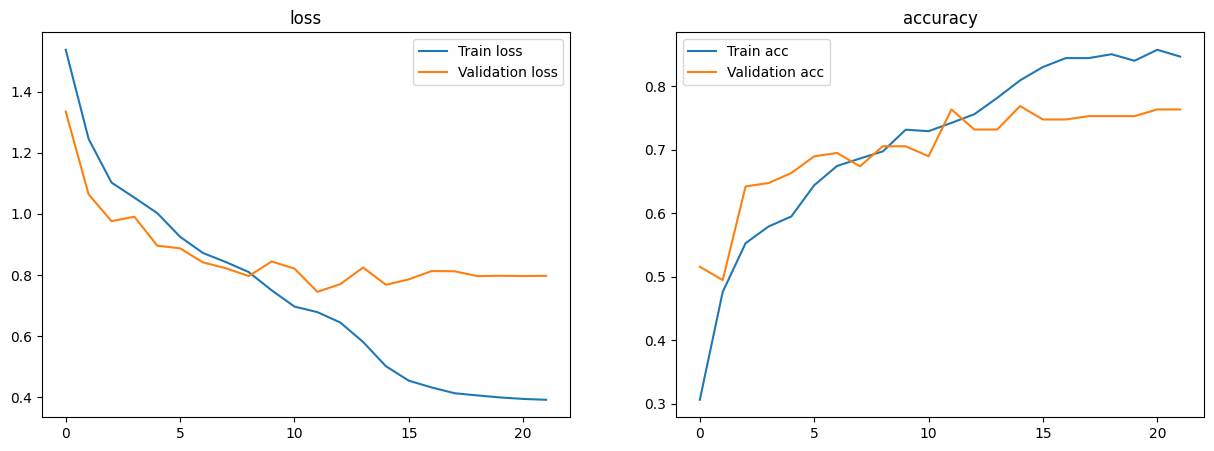

In [80]:
plot_history(history)

### Model evaluation

In [81]:
metrics = model1.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6025 - loss: 1.0682
1.031475305557251 0.6000000238418579


In [82]:
model1.save('/home/enric/code/tdurova/starsmiles/models/model1.keras')

# New model 2
Transfer learning

In [83]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model

In [84]:

en_model = EfficientNetV2B2(
    include_top=False,
    weights='imagenet',
    #input_tensor=None,
    input_shape=(64,64,3),
    pooling='Avg',
    #classes=1000,
    #classifier_activation='softmax',
    include_preprocessing=True
)

inputs = layers.Input(shape=(64,64,1))
x = en_model(inputs)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)

pred = layers.Dense(5, activation="softmax")(x)

model2 = Model(inputs= inputs, outputs = pred )

# Freeze the EfficientNetV2B2 model
en_model.trainable = False


In [85]:
model2.summary()

Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b2 (Functional)  │ (None, 2, 2, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5632)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,130,211 (34.83 MB)

 Trainable params: 360,837 (1.38 MB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [86]:
from tensorflow.keras import callbacks

MODEL = "model2"

modelCheckpoint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

In [87]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate = 0.001)

model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [88]:
%%time
history_2 = model2.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.3819 - loss: 1.4866 - val_accuracy: 0.5737 - val_loss: 1.1004 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5855 - loss: 1.0283 - val_accuracy: 0.6421 - val_loss: 1.0161 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6523 - loss: 0.9011 - val_accuracy: 0.6368 - val_loss: 0.9532 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6906 - loss: 0.7873 - val_accuracy: 0.7000 - val_loss: 0.8933 - learning_rate: 0.0010
Epoch 5/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7388 - loss: 0.6678 - val_accuracy: 0.6526 - val_loss: 1.0073 - learning_rate: 0.0010
Epoch 6/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.7571 - loss: 0.6225 - val_accuracy: 0.6842 - val_loss: 0.9008 - learning_rate: 0.0010
Epoch 7/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7779 - loss: 0.6137
Epoch 7

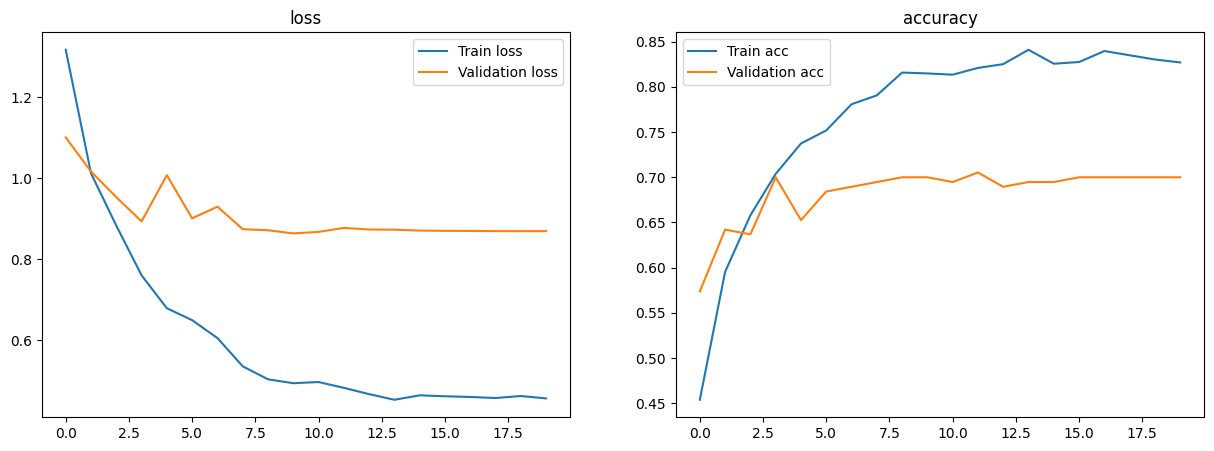

In [89]:
plot_history(history_2)

### evaluation

In [90]:
metrics = model2.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7279 - loss: 0.7414
0.8395143151283264 0.6818181872367859


In [91]:
model2.save('/home/enric/code/tdurova/starsmiles/models/model2.keras')

# New model 3
Resizing filters and kernel size

In [92]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model3 = Sequential()

# Define the input shape explicitly using Input
model3.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model3.add(layers.Rescaling(1./255))

# First Convolutional Block
model3.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model3.add(layers.Conv2D(filters=128, kernel_size=(4, 4), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model3.add(layers.Flatten())

# Fully Connected Dense Layer
model3.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model3.add(layers.Dropout(0.5))

# Output Layer with Softmax
model3.add(layers.Dense(5, activation="softmax"))

In [93]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model3.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,909 (859.02 KB)

 Trainable params: 219,909 (859.02 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
from tensorflow.keras import callbacks

MODEL = "model3"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [95]:
%%time
history3 = model3.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.2265 - loss: 1.5884
Epoch 1: val_loss improved from inf to 1.28670, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.2276 - loss: 1.5874 - val_accuracy: 0.4579 - val_loss: 1.2867 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4409 - loss: 1.3356
Epoch 2: val_loss improved from 1.28670 to 1.12644, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.4413 - loss: 1.3346 - val_accuracy: 0.5000 - val_loss: 1.1264 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5110 - loss: 1.1790
Epoch 3: val_loss improved from 1.12644 to 1.01064, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.5115 - loss: 1.1785 - val_accuracy: 0.6316 - val_loss: 1.0106 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5531 - loss: 1.

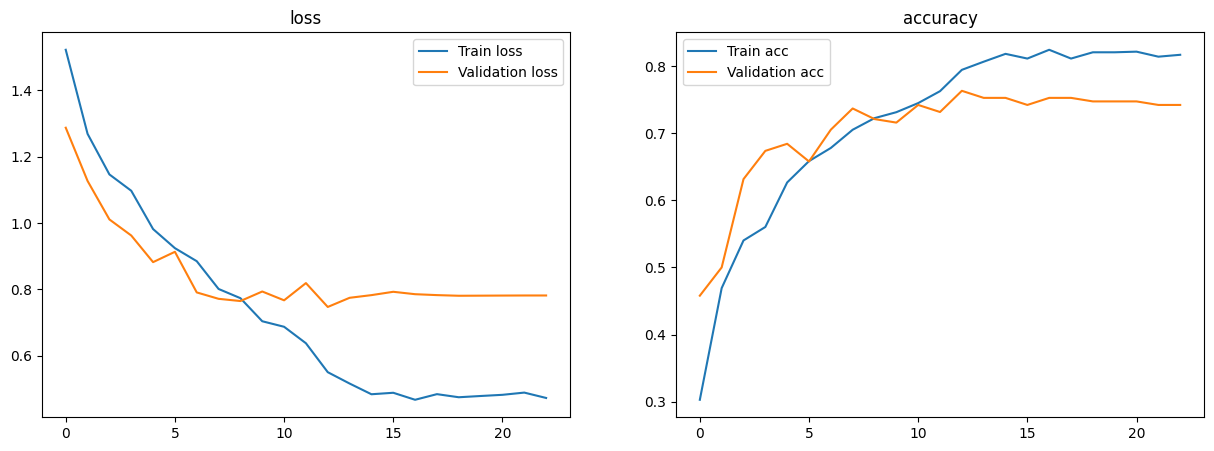

In [96]:
plot_history(history3)

### evaluation

In [97]:
metrics = model3.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6702 - loss: 0.9413
1.1025452613830566 0.6363636255264282


In [98]:
model3.save('/home/enric/code/tdurova/starsmiles/models/model3.keras')

# New model 4
Image resizing

In [99]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model4 = Sequential()

# Define the input shape explicitly using Input
model4.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model4.add(layers.Rescaling(1./255))
model4.add(layers.Resizing(132,132))

# First Convolutional Block
model4.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model4.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model4.add(layers.Conv2D(filters=128, kernel_size=(4, 4), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model4.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model4.add(layers.Flatten())

# Fully Connected Dense Layer
model4.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model4.add(layers.Dropout(0.5))

# Output Layer with Softmax
model4.add(layers.Dense(5, activation="softmax"))

In [100]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model4.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 132, 132, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 132, 132, 32)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 66, 66, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 66, 66, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 33, 33, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 33, 33, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,213 (1.21 MB)

 Trainable params: 318,213 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
from tensorflow.keras import callbacks

MODEL = "model4"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [102]:
%%time
history4 = model4.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.2373 - loss: 1.5879
Epoch 1: val_loss improved from inf to 1.29805, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 501ms/step - accuracy: 0.2383 - loss: 1.5870 - val_accuracy: 0.4737 - val_loss: 1.2980 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.4498 - loss: 1.3332
Epoch 2: val_loss improved from 1.29805 to 1.09312, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 31s 461ms/step - accuracy: 0.4504 - loss: 1.3323 - val_accuracy: 0.5895 - val_loss: 1.0931 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.5285 - loss: 1.1839
Epoch 3: val_loss improved from 1.09312 to 1.00919, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 32s 475ms/step - accuracy: 0.5288 - loss: 1.1835 - val_accuracy: 0.6316 - val_loss: 1.0092 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.5832 - loss

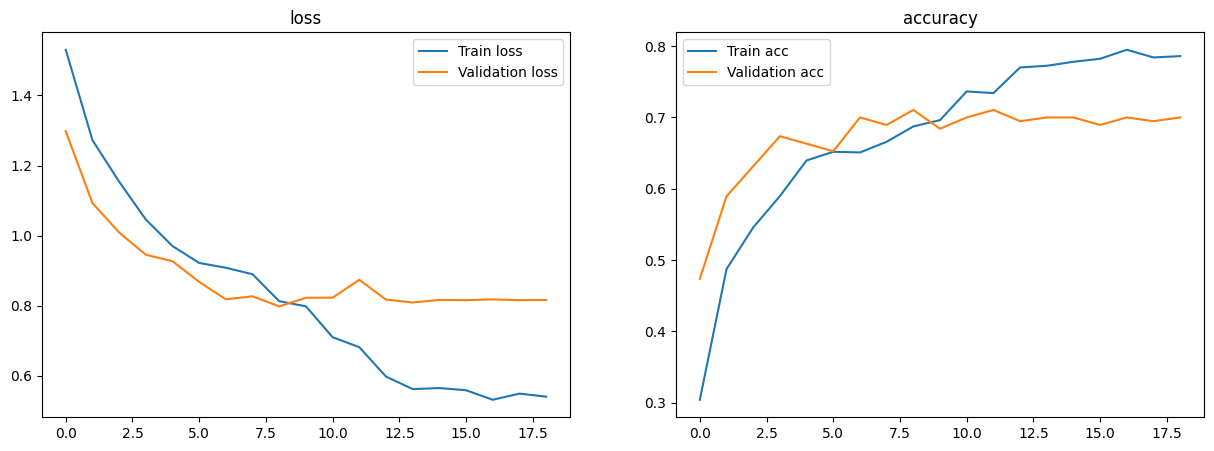

In [103]:
plot_history(history4)

### evaluation

In [104]:
metrics = model4.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6118 - loss: 1.1953
1.150992512702942 0.6363636255264282


# New model 5
Data augmentation on model 3

In [105]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model5 = Sequential()

# Define the input shape explicitly using Input
model5.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model5.add(layers.Rescaling(1./255))

# Data Augmentation Layers
model5.add(layers.RandomFlip('horizontal'))
model5.add(layers.RandomZoom(0.1))
model5.add(layers.RandomTranslation(0.2,0.2))
model5.add(layers.RandomRotation(0.1))


# First Convolutional Block
model5.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu", padding="same"))
model5.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model5.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model5.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model5.add(layers.Conv2D(filters=128, kernel_size=(4, 4), activation="relu", padding="same"))
model5.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model5.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model5.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model5.add(layers.Flatten())

# Fully Connected Dense Layer
model5.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model5.add(layers.Dropout(0.5))

# Output Layer with Softmax
model5.add(layers.Dense(5, activation="softmax"))

In [106]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model5.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 64, 64, 1)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,909 (859.02 KB)

 Trainable params: 219,909 (859.02 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
%%time
history5 = model5.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.2425 - loss: 1.5981
Epoch 1: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.2429 - loss: 1.5979 - val_accuracy: 0.3895 - val_loss: 1.4260 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3824 - loss: 1.4367
Epoch 2: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.3824 - loss: 1.4364 - val_accuracy: 0.4474 - val_loss: 1.2937 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3966 - loss: 1.3998
Epoch 3: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.3967 - loss: 1.3997 - val_accuracy: 0.4789 - val_loss: 1.2735 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4232 - loss: 1.3579
Epoch 4: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - a

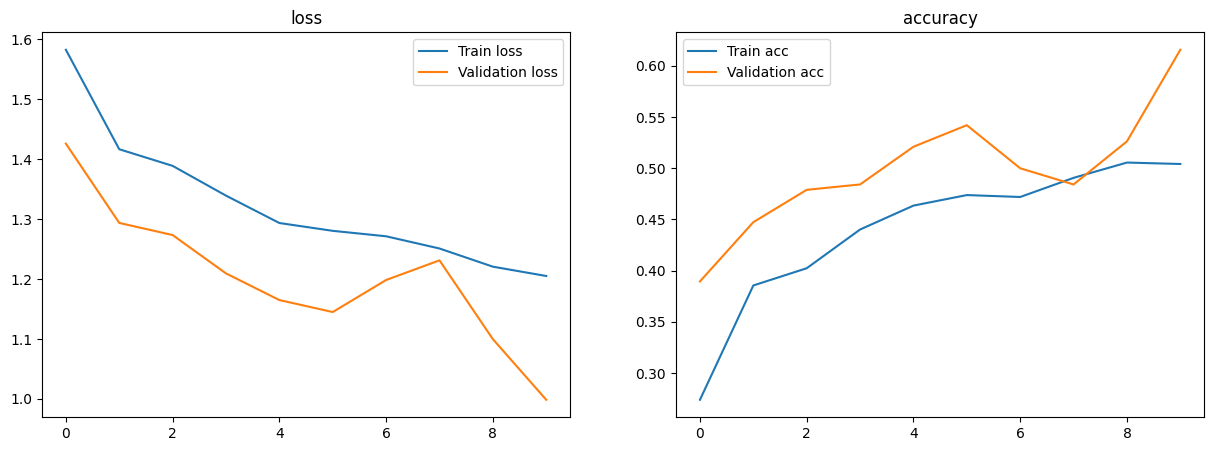

In [108]:
plot_history(history5)

### Evaluation

In [109]:
metrics = model5.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4147 - loss: 1.4735
1.4702794551849365 0.3909091055393219


# New model 6
random changes on model 3

In [110]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model6 = Sequential()

# Define the input shape explicitly using Input
model6.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model6.add(layers.Rescaling(1./255))

# First Convolutional Block
model6.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model6.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model6.add(layers.Conv2D(filters=128, kernel_size=(4, 4), activation="relu", padding="same"))
model6.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model6.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
#model6.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model6.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu", padding="same"))
model6.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model6.add(layers.Flatten())

# Fully Connected Dense Layer
model6.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model6.add(layers.Dropout(0.5))

# Output Layer with Softmax
model6.add(layers.Dense(5, activation="softmax"))

In [111]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model6.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 345,317 (1.32 MB)

 Trainable params: 345,317 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
%%time
history6 = model6.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.2499 - loss: 1.5758
Epoch 1: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 238ms/step - accuracy: 0.2511 - loss: 1.5746 - val_accuracy: 0.4368 - val_loss: 1.2862 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.4574 - loss: 1.2741
Epoch 2: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - accuracy: 0.4580 - loss: 1.2734 - val_accuracy: 0.6000 - val_loss: 1.0632 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.5498 - loss: 1.1332
Epoch 3: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.5502 - loss: 1.1328 - val_accuracy: 0.6105 - val_loss: 1.0136 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.6040 - loss: 1.0564
Epoch 4: val_loss did not improve from 0.79829
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step 

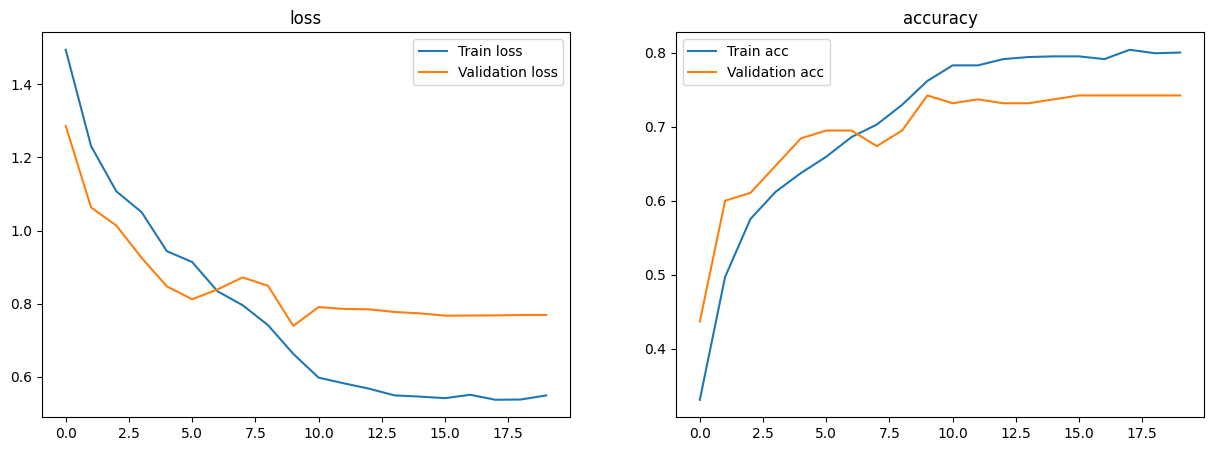

In [113]:
plot_history(history6)

### Evaluation

In [114]:
metrics = model6.evaluate(
        test_bal_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6493 - loss: 0.9810
1.0743380784988403 0.6363636255264282


# New model 7
image resizing over transfer learning model

In [115]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model

In [116]:
en_model = EfficientNetV2B2(
    include_top=False,
    weights='imagenet',
    #input_tensor=None,
    input_shape=(64,64,3),
    pooling='Avg',
    #classes=1000,
    #classifier_activation='softmax',
    include_preprocessing=True
)

inputs = layers.Input(shape=(64,64,1))
x = en_model(inputs)

x = layers.Resizing(150,150)(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)

pred = layers.Dense(5, activation="softmax")(x)

model7 = Model(inputs= inputs, outputs = pred )

# Freeze the EfficientNetV2B2 model
en_model.trainable = False

2024-09-11 12:14:29.921665: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8110080000 exceeds 10% of free system memory.


: 

In [ ]:
model7.summary()

In [ ]:
from tensorflow.keras import callbacks

MODEL = "model7"

modelCheckpoint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate = 0.001)

model7.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
%%time
history_7 = model7.fit(
        train_bal_ds,
        epochs=30,
        validation_data=val_bal_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

## Confusion Matrix

Create the data (y_true and y_pred)

In [61]:
model2 = load_model('/home/enric/code/tdurova/starsmiles/models/model2.keras')

In [40]:
from tensorflow.keras.models import load_model

model = load_model('/home/enric/code/tdurova/starsmiles/models/model.keras')

In [41]:
test_ds_0 = image_dataset_from_directory(
    TEST_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=1,
    image_size=(64, 64),
    shuffle=False
)

Found 110 files belonging to 5 classes.


In [42]:
l =list(test_ds_0)

y_t=[]
for i in range(len(l)):
    y_t.append(np.array(l[i][1]))

y_true = np.concatenate(y_t, axis=0)

2024-09-11 22:19:02.214697: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [43]:
y_p = model.predict(test_ds_0)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [44]:
y_pred = np.zeros((len(test_ds_0), 5))

for i, array in enumerate(y_p):
    for j, n in enumerate(array):
        if n==array.max():
            y_pred[i,j]=1

y_pred

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [45]:
tr = pd.from_dummies(pd.DataFrame(y_true))
pr = pd.from_dummies(pd.DataFrame(y_pred))

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(tr, pr)
cm

array([[ 2,  3,  0,  1, 16],
       [ 0, 19,  0,  0,  3],
       [ 0,  0,  5,  0, 17],
       [ 0,  4,  0, 18,  0],
       [ 0,  1,  0,  0, 21]])

In [47]:
#!pip install seaborn

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

<Axes: >

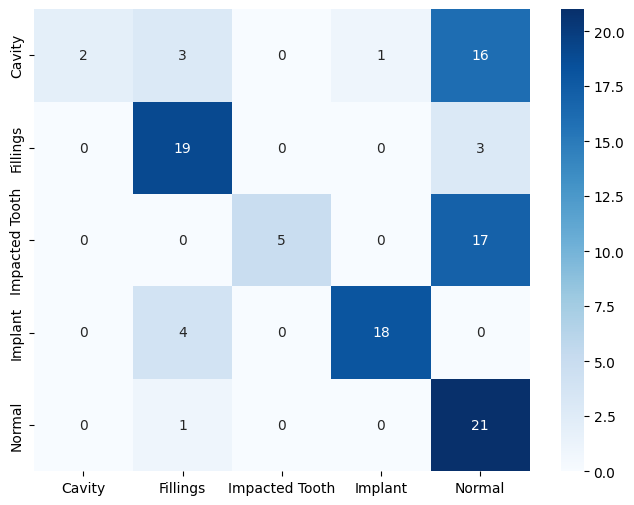

In [50]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(class_names),
            yticklabels=np.unique(class_names))

In [82]:
def confusion_matrix(model: str):

    from tensorflow.keras.models import load_model

    m = load_model(f'/home/enric/code/tdurova/starsmiles/models/{model}.keras')

    ds = image_dataset_from_directory(
    TEST_BAL_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=1,
    image_size=(64, 64),
    shuffle=False
    )
    l =list(ds)

    y_t=[]
    for i in range(len(l)):
        y_t.append(np.array(l[i][1]))

    y_true = np.concatenate(y_t, axis=0)
    y_p = m.predict(ds)

    y_pred = np.zeros((len(test_ds_0), 5))

    for i, array in enumerate(y_p):
        for j, n in enumerate(array):
            if n==array.max():
                y_pred[i,j]=1

    tr = pd.from_dummies(pd.DataFrame(y_true))
    pr = pd.from_dummies(pd.DataFrame(y_pred))

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(tr, pr)

    plt.figure(figsize=(8, 6))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(class_names),
            yticklabels=np.unique(class_names))


Found 110 files belonging to 5 classes.
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


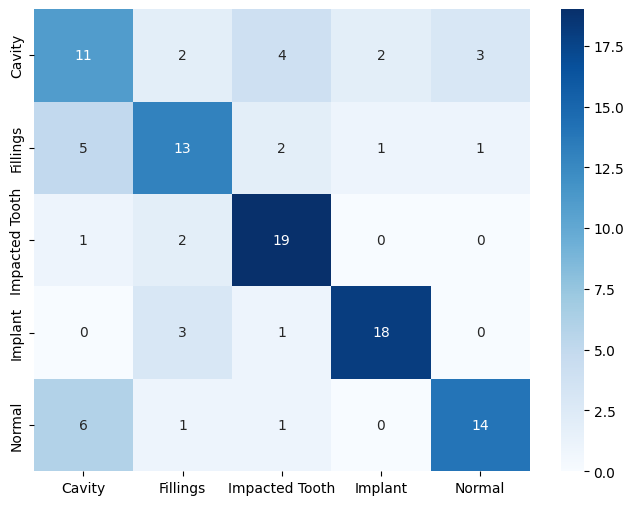

In [85]:
confusion_matrix('model2')